## Data Analysis using Python Mini-Project


### Data Cleaning and Exploratory Analysis 

In machine learning, you clean up the data and turn raw data into features from which you can derive the pattern. There are methods available to extract features that will be covered in upcoming sessions but it's very important to build the intuition. The process of data cleaning and visualization helps with that. In this assignment, we will try to manually identify the important features in the given dataset. 

### Dataset: Lending Club data

https://www.lendingclub.com/info/download-data.action

Years of data to download: 2007-2011

Load the Lending Club data into a pandas dataframe. The data contains 42538 rows and 145 columns. Not all these columns contain meaningful (or any) information so they need to be cleaned. The loans are categorized into different grades and sub-grades. It would be interesting to see whether they have any impact on the interest rates or not.
The process should lead us into default prediction, and finding the columns that directly predict how the loan will behave. These would be our most important features.

We strongly recommend that you look in to the columns closely to see the relationship between them. This is not a guided assignment and you can use the techniques that you have learnt so far to clean and visualize the data. 

There is no one right answer but this tests your ability to handle a much larger unknown dataset.

Here are the broad guidelines:

    View the data 
    Find the columns that are useful (may be null columns) and the ones that are not 
    Delete the columns that are not needed
    Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
    Identify the columns containing useful information, they would be the features. 
    Visualize the important features


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from bs4 import BeatifualSoup

In [3]:
loan = pd.read_csv('C:/Users/HP/Documents/loandata.csv')
loan.head(5)

,loan_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,15-Jan,171.62,18-Sep
1,2,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,13-Apr,119.66,16-Oct
2,3,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,14-Jun,649.91,17-Jun
3,4,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,15-Jan,357.48,16-Apr
4,5,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,17-Jan,67.30,18-Apr


In [4]:
loan.shape

(42542, 40)

In [5]:
print(loan.describe())

          loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  42535.000000  42535.000000     42535.000000  42535.000000   
mean   11089.722581  10821.585753     10139.938548    322.623063   
std     7410.938391   7146.914675      7131.597633    208.927216   
min      500.000000    500.000000         0.000000     15.670000   
25%     5200.000000   5000.000000      4950.000000    165.520000   
50%     9700.000000   9600.000000      8500.000000    277.690000   
75%    15000.000000  15000.000000     14000.000000    428.180000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  4.253100e+04  42535.000000  42506.000000    42506.000000   
mean   6.913656e+04     13.373043      0.152449        1.081424   
std    6.409635e+04      6.726315      0.512406        1.527455   
min    1.896000e+03      0.000000      0.000000        0.000000   
25%    4.000000e+04      8.200000      0.000000     

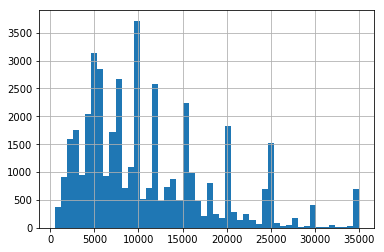

In [6]:
loan['loan_amnt'].hist(bins=50)

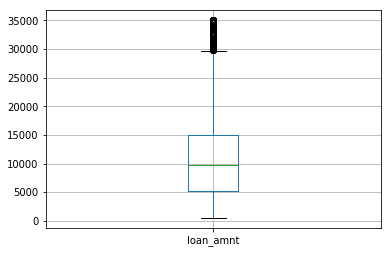

In [7]:
loan.boxplot(column='loan_amnt')

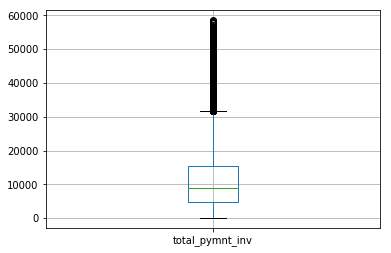

In [8]:
loan.boxplot(column='total_pymnt_inv')

In [9]:
loan.columns

Index(['loan_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d'],
      dtype='object')

In [10]:
#missing data
total = loan.isnull().sum().sort_values(ascending=False)
percent = (loan.isnull().sum()/loan.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
mths_since_last_delinq,26933,0.633092
desc,13300,0.312632
emp_title,2633,0.061892
emp_length,1119,0.026303
revol_util,97,0.002280
last_pymnt_d,90,0.002116
inq_last_6mths,36,0.000846
delinq_2yrs,36,0.000846
total_acc,36,0.000846
earliest_cr_line,36,0.000846


In [11]:
total = loan.groupby(['loan_id','emp_title'])['total_pymnt'].max().sort_values(ascending = False).head(10)
total

loan_id  emp_title                         
3309     MESA VISTA OF BOULDER                 58886.47343
5198     Purdue Pharma                         58563.67993
10640    ConocoPhillips Inc.                   58480.13992
3448     Onyx Specialty Papers                 58133.31990
2481     Motiva Enterprises                    58090.95207
2510     EOIR Technologies, Inc.               58071.19982
3819     Audit-Tel, Inc.                       58071.19977
3267     STANLEY BLACK AND DECKER              57997.27995
6091     Wipro                                 57835.27991
2844     Los Angeles County Fire Department    57143.25996
Name: total_pymnt, dtype: float64

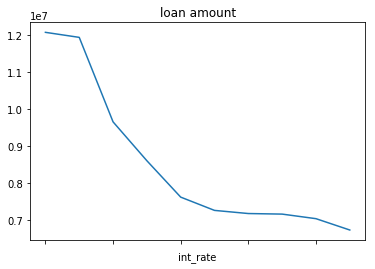

In [12]:
total = loan.groupby(['int_rate']).total_pymnt.sum().nlargest(10)
total.plot(title='loan amount', rot=30)

In [13]:
loan['last_credit_pull_d'].value_counts().head(10)

18-Sep    8851
16-Oct    4049
18-Aug    1289
18-Jul    1070
17-Feb     700
18-May     670
13-Feb     561
18-Mar     559
18-Apr     548
18-Jan     523
Name: last_credit_pull_d, dtype: int64

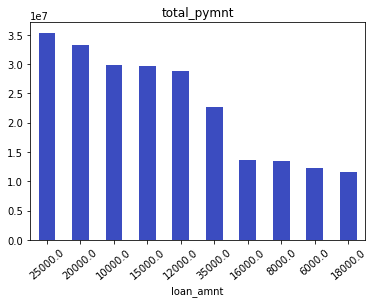

In [14]:
total=loan.groupby(['loan_amnt']).funded_amnt.sum().nlargest(10)\
.plot(kind='bar',title='total_pymnt', rot=40,colormap='coolwarm')

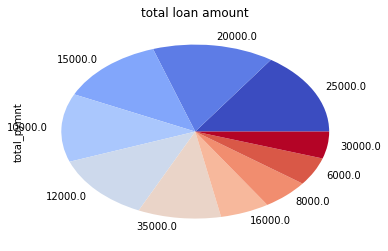

In [15]:
total=loan.groupby(['loan_amnt']).total_pymnt.sum().nlargest(10)\
.plot(kind='pie',title='total loan amount', rot=40,colormap='coolwarm')

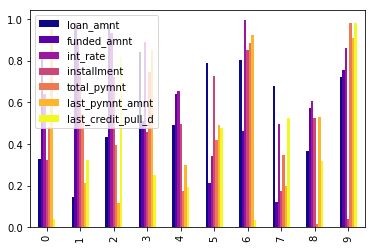

In [16]:
df = pd.DataFrame(np.random.rand(10,7),columns=['loan_amnt','funded_amnt','int_rate','installment','total_pymnt','last_pymnt_amnt','last_credit_pull_d'])
df
df.plot.bar(colormap = 'plasma')

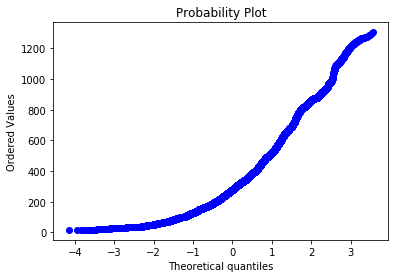

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
res = stats.probplot(loan['installment'], plot=plt)

In [18]:
#sns.FacetGrid(loan, hue="loan_id", size=6) \
#   .map(sns.kdeplot, "total_pymnt") \
#   .add_legend()

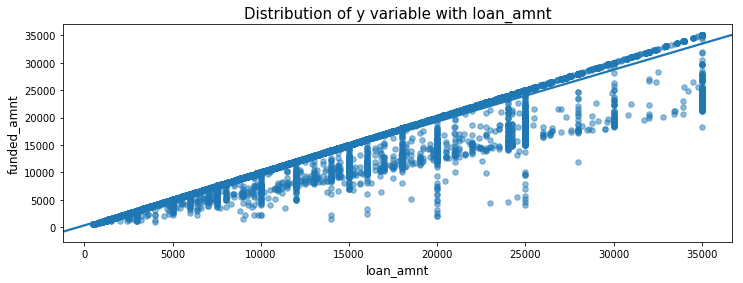

In [19]:
var_name = "loan_amnt"
fig = plt.figure(figsize=(12,4))
sns.regplot(x=var_name, y='funded_amnt', data=loan, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('funded_amnt', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

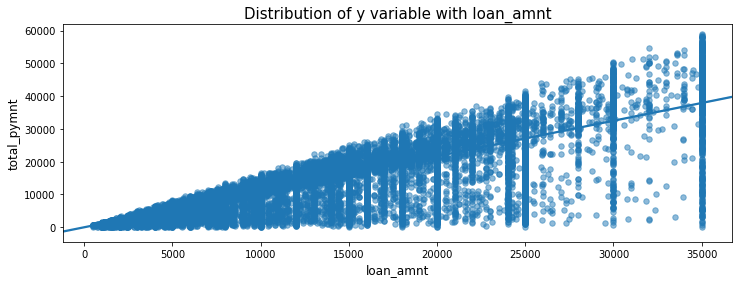

In [20]:
var_name = "loan_amnt"
fig = plt.figure(figsize=(12,4))
sns.regplot(x=var_name, y='total_pymnt', data=loan, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('total_pymnt', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

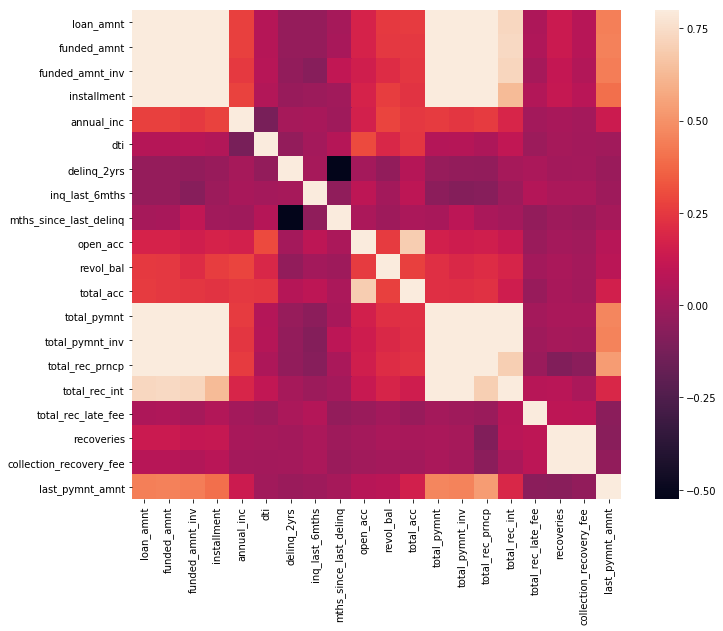

In [21]:
#correlation matrix
corrmat = loan.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [29]:
loan[['loan_amnt', 'total_pymnt_inv']].groupby(['loan_amnt'],
                                               as_index = False).mean().sort_values(by = 'loan_amnt', ascending = False).head(10)

,loan_amnt,total_pymnt_inv
897,35000.0,36337.406453
896,34800.0,37228.865000
895,34675.0,46584.890000
894,34525.0,47516.150000
893,34475.0,36527.314000
892,34200.0,37055.100000
891,34000.0,39854.805333
890,33950.0,32795.710000
889,33600.0,47593.758333
888,33500.0,26554.295000


In [30]:
loan[['loan_amnt', 'total_pymnt']].groupby(['loan_amnt'],
                                               as_index = False).mean().sort_values(by = 'loan_amnt', ascending = False).head(10)

,loan_amnt,total_pymnt
897,35000.0,37727.495851
896,34800.0,37228.866825
895,34675.0,46618.499920
894,34525.0,47862.730080
893,34475.0,37186.092856
892,34200.0,37092.488620
891,34000.0,40654.272260
890,33950.0,33837.817026
889,33600.0,48669.905730
888,33500.0,26591.685070


In [31]:
loan[['total_rec_prncp', 'total_rec_int']].groupby(['total_rec_prncp'],
                                               as_index = False).mean().sort_values(by = 'total_rec_prncp', ascending = False).head(15)

,total_rec_prncp,total_rec_int
7690,35000.02,14004.635000
7689,35000.01,10377.150000
7688,35000.00,10076.709522
7687,34999.99,12676.462857
7686,34999.98,9599.490000
7685,34999.97,16106.370000
7684,34800.00,8035.920000
7683,34675.00,11943.500000
7682,34525.00,13337.730000
7681,34475.01,11007.380000
